In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
def cross_validate_learning_rate(estimator, x_train, y_train, cv = 5, scoring = 'roc_auc', return_train_score = True):
    results = cross_validate(estimator,
                            x_train,
                            y_train,
                            cv = cv,
                            scoring=scoring,
                            return_train_score = return_train_score ) 
    train_scores = results['train_score']
    test_scores = results['test_score']
    print("train_scores: {}".format(np.mean(train_scores)))
    print("test_scores: {}".format(np.mean(test_scores)))

    lc = learning_curve(estimator, 
                        x_train, 
                        y_train, 
                        cv=cv, 
                        scoring=scoring)
    samples, train, test = lc[0],lc[1],lc[2]
    plt.plot(samples, np.mean(train, axis=1))
    plt.plot(samples, np.mean(test, axis=1))

In [3]:
from sklearn.model_selection import GridSearchCV
def grid_search_param(X, y,nfolds, param_grid, model_sklearn, scoring = 'roc_auc'):
    grid_search = GridSearchCV(model_sklearn, param_grid, cv=nfolds, return_train_score=True, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search

In [4]:
path = '../data'
y_train = pd.read_csv(f'{path}/y_train.csv', index_col = 'key_value')

In [5]:
list_train_probs = []
list_train_probs.append(pd.read_pickle('train_probs_catboost.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_lightgbm.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_lightgbm_cf.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_lightgbm_cf_v2.pkl'))
# list_train_probs.append(pd.read_pickle('train_probs_rnn.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_randomforrest.pkl'))
list_train_probs.append(pd.read_pickle('train_probs_gbc.pkl'))
train = pd.concat(list_train_probs, axis=1)
train.columns = ['probs_catboost','probs_lightgbm','probs_lightgbm_cf','probs_lightgbm_cf_v2','probs_randomforrest','probs_gbc']
train

,probs_catboost,probs_lightgbm,probs_lightgbm_cf,probs_lightgbm_cf_v2,probs_randomforrest,probs_gbc
key_value,,,,,,
0,0.062713,0.096995,0.078198,0.028968,0.050,0.059608
1,0.172378,0.120937,0.139226,0.246109,0.218,0.096507
2,0.043189,0.030878,0.040922,0.028247,0.164,0.059238
3,0.015488,0.007011,0.007812,0.009031,0.008,0.043243
4,0.966677,0.907985,0.934218,0.952780,0.754,0.892675
...,...,...,...,...,...,...
358482,0.053730,0.035514,0.027077,0.060988,0.088,0.071991
358483,0.089553,0.068123,0.072695,0.132078,0.114,0.115863
358484,0.274641,0.300092,0.286781,0.322986,0.226,0.276635


In [6]:
list_test_probs = []
list_test_probs.append(pd.read_pickle('test_probs_catboost.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_lightgbm.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_lightgbm_cf.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_lightgbm_cf_v2.pkl'))
# list_test_probs.append(pd.read_pickle('test_probs_rnn.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_randomforrest.pkl'))
list_test_probs.append(pd.read_pickle('test_probs_gbc.pkl'))
test = pd.concat(list_test_probs, axis=1)
test.columns = ['probs_catboost','probs_lightgbm','probs_lightgbm_cf','probs_lightgbm_cf_v2','probs_randomforrest','probs_gbc']
test

,probs_catboost,probs_lightgbm,probs_lightgbm_cf,probs_lightgbm_cf_v2,probs_randomforrest,probs_gbc
key_value,,,,,,
0,0.004375,0.003414,0.006130,0.005107,0.0216,0.036597
1,0.129511,0.089371,0.126142,0.185215,0.1944,0.157901
2,0.036032,0.029937,0.030534,0.034969,0.0488,0.098302
3,0.487781,0.515579,0.538598,0.512036,0.5500,0.667766
4,0.230619,0.170546,0.174889,0.170060,0.1880,0.196125
...,...,...,...,...,...,...
396661,0.068660,0.089503,0.047992,0.072626,0.1136,0.068843
396662,0.204846,0.157482,0.216880,0.268088,0.0852,0.098013
396663,0.294800,0.292400,0.268474,0.361281,0.2944,0.215448


In [7]:
train.corr()

,probs_catboost,probs_lightgbm,probs_lightgbm_cf,probs_lightgbm_cf_v2,probs_randomforrest,probs_gbc
probs_catboost,1.000000,0.974174,0.965898,0.959694,0.910201,0.944679
probs_lightgbm,0.974174,1.000000,0.978572,0.971326,0.913154,0.942251
probs_lightgbm_cf,0.965898,0.978572,1.000000,0.981265,0.908106,0.937564
probs_lightgbm_cf_v2,0.959694,0.971326,0.981265,1.000000,0.901271,0.934116
probs_randomforrest,0.910201,0.913154,0.908106,0.901271,1.000000,0.924381
probs_gbc,0.944679,0.942251,0.937564,0.934116,0.924381,1.000000


In [8]:
test.corr()

,probs_catboost,probs_lightgbm,probs_lightgbm_cf,probs_lightgbm_cf_v2,probs_randomforrest,probs_gbc
probs_catboost,1.000000,0.988949,0.982997,0.978555,0.934485,0.964755
probs_lightgbm,0.988949,1.000000,0.988800,0.983482,0.932992,0.959463
probs_lightgbm_cf,0.982997,0.988800,1.000000,0.991799,0.929425,0.956214
probs_lightgbm_cf_v2,0.978555,0.983482,0.991799,1.000000,0.924967,0.954262
probs_randomforrest,0.934485,0.932992,0.929425,0.924967,1.000000,0.944331
probs_gbc,0.964755,0.959463,0.956214,0.954262,0.944331,1.000000


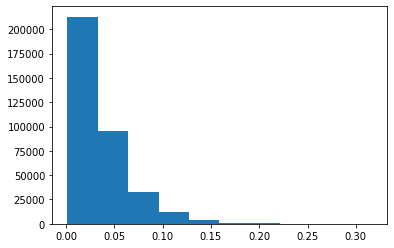

In [9]:
plt.hist(np.std(train.values, axis=1));

### Entrenando el modelo final

In [10]:
from sklearn.linear_model import LogisticRegression
### definir los parametros a tunear
Cs = [0.1, 0.3, 0.8, 0.9, 1.0]
# https://neurtu.readthedocs.io/examples/logistic_regression_scaling.html
solvers = ['lbfgs','saga','newton-cg'] # newton-cg, sag, lbfgs, liblinear, saga
param_grid = {'C': Cs,'solver':solvers}
### encontrando los hiper_parámetros
fitting=grid_search_param(train, y_train.target, 5,param_grid, LogisticRegression(penalty="l2", tol=0.0001, random_state=42), scoring='roc_auc')
### instanciar el estimador
estimator = fitting.best_estimator_
print(estimator)
### aplicar cross_validate y learning_rate 
# cross_validate_learning_rate(estimator, train, y_train, scoring='roc_auc')

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


train_scores: 0.8528896152741565
test_scores: 0.8528665080872543


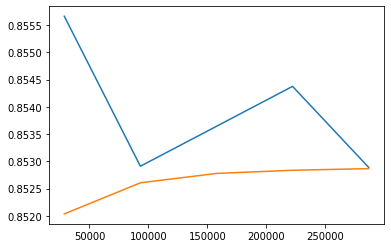

In [11]:
### aplicar cross_validate y learning_rate 
cross_validate_learning_rate(estimator, train, y_train.target, scoring='roc_auc')

In [12]:
estimator.fit(train, y_train.target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
test_stacking = pd.Series(estimator.predict_proba(test)[:,-1], index=test.index, name = 'target')
test_stacking

key_value
0         0.043699
1         0.098240
2         0.049501
3         0.526558
4         0.130600
            ...   
396661    0.072940
396662    0.148461
396663    0.276250
396664    0.053379
396665    0.040911
Name: target, Length: 396666, dtype: float64

In [14]:
test_stacking.to_csv("../results/stacking_6models_0.85286_all_training.csv") ### score de 0.84904 en la tabla publica

In [ ]:
# test_stacking.to_csv("../results/stacking_5models_0.85267_all_training.csv") ### score de 0.84904 en la tabla publica

In [ ]:
# test_stacking.to_csv("../results/stacking_5models_0.85306_all_training.csv") ### score de 0.84868 en la tabla publica

In [ ]:
# test_stacking.to_csv("../results/stacking_4models_0.85313_all_training.csv") ### score de 0.84868 en la tabla publica